# Importing required packages

In [1]:
import os
from os import listdir
import matplotlib.pyplot as plt
import numpy
import numpy as np
import PIL
from PIL import Image
import random
from random import randint
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.callbacks import TensorBoard
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Nadam
from keras.activations import relu
import pylab as pl
from sklearn.metrics import classification_report
from keras import backend as K
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras.callbacks import ModelCheckpoint
%matplotlib inline

Using TensorFlow backend.


#  Storing names of cat and dog images

In [2]:
cat_dir = './CatsandDogs/cats/'
dog_dir = './CatsandDogs/dogs/'
cat_img_names = [f for f in listdir(cat_dir)]
dog_img_names = [f for f in listdir(dog_dir)]

# Getting insights from data

In [3]:
print "Number of cat images : ",len(cat_img_names), ", Number of dog images : ",len(dog_img_names)

Number of cat images :  12500 , Number of dog images :  12500


In [4]:
cat = plt.imread(cat_dir+'0.jpg')
dog = plt.imread(dog_dir+'0.jpg')
print "Cat Image Dimensions : ",np.shape(cat), ", Dog Image Dimensions : ",np.shape(dog)

Cat Image Dimensions :  (64, 64, 3) , Dog Image Dimensions :  (64, 64, 3)


Cat Image


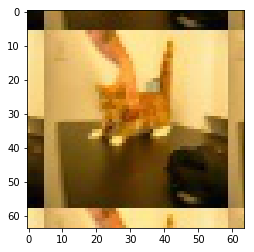

In [5]:
print "Cat Image"
plt.imshow(cat)

Dog Image


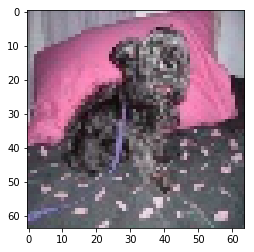

In [6]:
print "Dog Image"
plt.imshow(dog)

# Mean Cat Image

Mean Cat Image


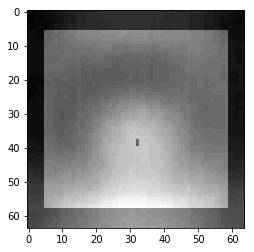

In [85]:
# Access all PNG files in directory
allfiles=os.listdir('./CatsandDogs/cats/')
imlist=[filename for filename in allfiles if  filename[-4:] in [".jpg",".JPG"]]
# Assuming all images are the same size, get dimensions of first image
N=len(imlist)

# Create a numpy array of floats to store the average (assume RGB images)
arr=numpy.zeros((64,64),numpy.float)
# Build up average pixel intensities, casting each image as an array of floats
for im in imlist:
    imarr=numpy.array(Image.open(cat_dir+im),dtype=numpy.float)
    imarr = imarr[:,:,0]
    arr=arr+imarr/N

# Round values in array and cast as 8-bit integer
mean_cat_image=numpy.array(numpy.round(arr),dtype=numpy.uint8)

print "Mean Cat Image"

plt.imshow(mean_cat_image,cmap="gray")

# Mean Dog Image

Mean Dog Image


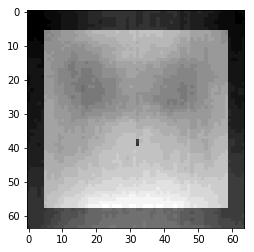

In [83]:
# Access all PNG files in directory
allfiles=os.listdir('./CatsandDogs/dogs/')
imlist=[filename for filename in allfiles if  filename[-4:] in [".jpg",".JPG"]]
# Assuming all images are the same size, get dimensions of first image
N=len(imlist)

# Create a numpy array of floats to store the average (assume RGB images)
arr=numpy.zeros((64,64),numpy.float)

# Build up average pixel intensities, casting each image as an array of floats
for im in imlist:
    imarr=numpy.array(Image.open(dog_dir+im),dtype=numpy.float)
    imarr = imarr[:,:,0]
    arr=arr+imarr/N

# Round values in array and cast as 8-bit integer
mean_dog_image=numpy.array(numpy.round(arr),dtype=numpy.uint8)

print "Mean Dog Image"

plt.imshow(mean_dog_image,cmap="gray")

# Data Generation Technique 1

In [58]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


for im in imlist:
    imarr=numpy.array(Image.open(cat_dir+im),dtype=numpy.float)
    imarr = imarr.reshape((1,)+imarr.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    #imarr = imarr[:,:,0]
    
    
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(imarr, batch_size=1,
                          save_to_dir='./CatsandDogs/gen_data_cats/', save_prefix='', save_format='jpg'):
        i += 1
        if i > 1:
            break  # otherwise the generator would loop indefinitely

# Data Generation Technique 2

In [84]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
for im in imlist:
    imarr=numpy.array(Image.open(dog_dir+im),dtype=numpy.float)
    imarr = imarr.reshape((1,)+imarr.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    #imarr = imarr[:,:,0]
    
    
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(imarr, batch_size=1,
                          save_to_dir='./CatsandDogs/gen_data_dogs_2/', save_prefix='', save_format='jpg'):
        i += 1
        if i > 10:
            break  # otherwise the generator would loop indefinitely

# Combining available and generated cat images

In [87]:
cat_dir = './CatsandDogs/cats/'
cat_images = np.zeros((12500,64,64))
cat_img_names = [f for f in listdir(cat_dir)]
for i in range(len(cat_img_names)):
    im = plt.imread(cat_dir+cat_img_names[i])
    cat_images[i] = im[:,:,0]

In [88]:
gen_cat_dir = './CatsandDogs/gen_data_cats_2/'
gen_cat_img_names = [f for f in listdir(gen_cat_dir)]
gen_cat_images = np.zeros((len(gen_cat_img_names),64,64))
for i in range(len(gen_cat_img_names)):
    im = plt.imread(gen_cat_dir+gen_cat_img_names[i])
    gen_cat_images[i] = im[:,:,0]

In [89]:
t_cat_images = np.zeros((len(cat_img_names)+len(gen_cat_img_names),64,64))
t_cat_images[:len(cat_img_names)] = cat_images[:len(cat_img_names)]
t_cat_images[len(cat_img_names):len(cat_img_names)+len(gen_cat_img_names)] = gen_cat_images[:len(gen_cat_img_names)]

# Combining available and generated dog images

In [90]:
dog_dir = './CatsandDogs/dogs/'
dog_images = np.zeros((12500,64,64))
dog_img_names = [f for f in listdir(dog_dir)]
for i in range(len(dog_img_names)):
    im = plt.imread(dog_dir+dog_img_names[i])
    dog_images[i] = im[:,:,0]

In [91]:
gen_dog_dir = './CatsandDogs/gen_data_dogs_2/'
gen_dog_img_names = [f for f in listdir(gen_dog_dir)]
gen_dog_images = np.zeros((len(gen_dog_img_names),64,64))
for i in range(len(gen_dog_img_names)):
    im = plt.imread(gen_dog_dir+gen_dog_img_names[i])
    gen_dog_images[i] = im[:,:,0]

In [92]:
t_dog_images = np.zeros((len(dog_img_names)+len(gen_dog_img_names),64,64))
t_dog_images[:len(dog_img_names)] = dog_images[:len(dog_img_names)]
t_dog_images[len(dog_img_names):len(dog_img_names)+len(gen_dog_img_names)] = gen_dog_images[:len(gen_dog_img_names)]

# Centering data

In [9]:
cat_images = np.zeros((12500,64,64))
dog_images = np.zeros((12500,64,64))
images = np.zeros((25000,64,64))
for i in range(len(cat_img_names)):
    im = plt.imread(cat_dir+cat_img_names[i])
    cat_images[i] = im[:,:,0]
    cat_images[i]-= mean_cat_image
    im = plt.imread(dog_dir+dog_img_names[i])
    dog_images[i] = im[:,:,0]
    dog_images[i]-= mean_dog_image
images[:12500] = cat_images[:]
images[12500:] = dog_images[:]
labels = np.zeros((25000,1))
labels[:12500] = 0
labels[12500:] = 1

In [94]:
images = np.zeros((45000,64,64))
labels = np.zeros((45000,1))
images[:22500] = t_cat_images[:]
images[22500:45000] = t_dog_images[:]
labels[:22500] = 0
labels[22500:45000] = 1

# Making 80, 20 split for training and test data

In [10]:
indices = np.arange(25000)
random.shuffle(indices)
train_data = images[indices[:20000]]
train_labels = labels[indices[:20000]]
test_data = images[indices[20000:25000]]
test_labels = labels[indices[20000:25000]]

In [95]:
indices = np.arange(45000)
random.shuffle(indices)
train_data = images[indices[:22500]]
train_labels = labels[indices[:22500]]
test_data = images[indices[22500:45000]]
test_labels = labels[indices[22500:45000]]

In [96]:
np.shape(t_cat_images),np.shape(t_dog_images)

((22500, 64, 64), (22500, 64, 64))

# Adding an additional dimension to data

In [97]:
train_data = train_data[..., np.newaxis]
test_data = test_data[..., np.newaxis]

In [98]:
print "Train data dimensions : ", np.shape(train_data),",","Train label dimensions : ",np.shape(train_labels)
print "Test data dimensions : ",np.shape(test_data),",","Test label dimensions : ",np.shape(test_labels)

Train data dimensions :  (22500, 64, 64, 1) , Train label dimensions :  (22500, 1)
Test data dimensions :  (22500, 64, 64, 1) , Test label dimensions :  (22500, 1)


# Building Model

# Model 1 - Default architecture provided - 256 as batch size - lr = 0.0001 - validation split = 0.25

In [13]:
im_width = 64
im_height = 64
model = Sequential()
model.add(Convolution2D(kernel_size=(3,3),filters=3,input_shape=(im_width, im_height,1),activation="relu",padding="valid"))
model.add(Convolution2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(kernel_size=(3,3),filters=3,activation="relu",padding="same"))
model.add(Convolution2D(kernel_size=(5,5),filters=5,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Convolution2D(kernel_size=(2,2),strides=(2,2),filters=10))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.0001, momentum=0.9, decay=0.0, nesterov=True), metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 3)         30        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 10)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 3)         273       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 5)         380       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 5)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 10)          210       
__________

# Model 2 - lr = 0.001

In [13]:
im_width = 64
im_height = 64
model = Sequential()
model.add(Convolution2D(kernel_size=(3,3),filters=3,input_shape=(im_width, im_height,1),activation="relu",padding="valid"))
model.add(Convolution2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(kernel_size=(3,3),filters=3,activation="relu",padding="same"))
model.add(Convolution2D(kernel_size=(5,5),filters=5,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Convolution2D(kernel_size=(2,2),strides=(2,2),filters=10))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.001, momentum=0.9, decay=0.0, nesterov=True), metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 3)         30        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 10)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 3)         273       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 5)         380       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 5)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 10)          210       
__________

# Model 3 - lr = 0.00001 - kernel initialization using he_uniform - using 64, 32, 16, 32, 64 (3x3) filters for convolution layers and 32 neurons in the first dense layer

In [35]:
im_width = 64
im_height = 64
model = Sequential()
model.add(Convolution2D(kernel_size=(3,3),filters=64,input_shape=(im_width, im_height,1),activation="relu",padding="valid",kernel_initializer='he_uniform'))
model.add(Convolution2D(kernel_size=(3,3),filters=32,activation="relu",padding="same",kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(kernel_size=(3,3),filters=16,activation="relu",padding="same",kernel_initializer='he_uniform'))
model.add(Convolution2D(kernel_size=(3,3),filters=32,activation="relu",padding="same",kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(kernel_size=(3,3),filters=64,activation="relu",kernel_initializer='he_uniform'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu",kernel_initializer='he_uniform'))
model.add(Dense(1,activation="sigmoid",kernel_initializer='he_uniform'))
model.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.00001, momentum=0.9, decay=0.0, nesterov=True), metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 62, 62, 32)        18464     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 31, 31, 16)        4624      
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 31, 31, 32)        4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 13, 13, 64)        18496     
__________

# Model 4 - lr = 0.001 without he_uniform as weight initialization

In [18]:
im_width = 64
im_height = 64
model = Sequential()
model.add(Convolution2D(kernel_size=(3,3),filters=64,input_shape=(im_width, im_height,1),activation="relu",padding="valid"))
model.add(Convolution2D(kernel_size=(3,3),filters=32,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(kernel_size=(3,3),filters=16,activation="relu",padding="same"))
model.add(Convolution2D(kernel_size=(3,3),filters=32,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(kernel_size=(3,3),filters=64,activation="relu"))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.001, momentum=0.9, decay=0.0, nesterov=True), metrics=["binary_accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 62, 62, 32)        18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 31, 31, 16)        4624      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 31, 31, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 13, 13, 64)        18496     
__________

# Model 5 - lr = 0.0001

In [44]:
im_width = 64
im_height = 64
model = Sequential()
model.add(Convolution2D(kernel_size=(3,3),filters=64,input_shape=(im_width, im_height,1),activation="relu",padding="same"))
model.add(Convolution2D(kernel_size=(3,3),filters=32,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.2))
model.add(Convolution2D(kernel_size=(3,3),filters=16,activation="relu",padding="same"))
model.add(Convolution2D(kernel_size=(3,3),filters=32,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(kernel_size=(3,3),filters=64,activation="relu",padding="same"))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.0001, momentum=0.9, decay=0.0, nesterov=True), metrics=["binary_accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 32, 32, 16)        4624      
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 16, 16, 32)        0         
__________

# Model 6 - batch size of 512

In [58]:
im_width = 64
im_height = 64
model = Sequential()
model.add(Convolution2D(kernel_size=(3,3),filters=64,input_shape=(im_width, im_height,1),activation="relu",padding="same"))
model.add(Convolution2D(kernel_size=(3,3),filters=32,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(kernel_size=(3,3),filters=16,activation="relu",padding="same"))
model.add(Convolution2D(kernel_size=(3,3),filters=32,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(kernel_size=(3,3),filters=64,activation="relu",padding="same"))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.0001, momentum=0.9, decay=0.0, nesterov=True), metrics=["binary_accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_106 (Conv2D)          (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 64, 64, 32)        18464     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 32, 32, 16)        4624      
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 16, 16, 64)        18496     
__________

# Model 7 - rmsprop as optimizer - 32, 32, 64 filters for convolution layers 64 neurons in the first dense layer - dropout = 0.5

In [63]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 62, 62, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 12, 12, 64)        18496     
__________

# Model 8 - 32, 32, 64, 64 filters for convolution layers

In [71]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 62, 62, 32)        320       
_________________________________________________________________
activation_18 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 12, 12, 64)        18496     
__________

# Model 9 - 64, 128, 64, 32 filters for convolution layers

In [82]:
model = Sequential()

model.add(Convolution2D(64, (3, 3), input_shape=(64, 64, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Convolution2D(16, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_165 (Conv2D)          (None, 62, 62, 64)        640       
_________________________________________________________________
activation_55 (Activation)   (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 29, 29, 128)       73856     
_________________________________________________________________
activation_56 (Activation)   (None, 29, 29, 128)       0         
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 12, 12, 64)        73792     
__________

# Model 10 - 32, 32, 64 filters for convolution layers with centered data

In [2]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
__________

# Model 11 - using first technique for data generation

In [3]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
__________

# Model 12 - using second technique for data generation

In [5]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 29, 29, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 64)        18496     
__________

# Model 13 - 64, 64, 128, 128, 256 conv filters, 0.5 dropout, 256 dense neurons

In [3]:
model = Sequential()
model.add(Convolution2D(64, 3, padding='same', activation='relu',  input_shape=input_shape))
model.add(Convolution2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 256)       295168    
__________

# Model 14 - 128, 128, 256, 256, 512 conv filters

In [4]:
model = Sequential()
model.add(Convolution2D(128, 3, padding='same', activation='relu',  input_shape=input_shape))
model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(512, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 128)       3584      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 256)       295168    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 256)       590080    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 512)       1180160   
__________

# Model 15 - adding more dropout layers

In [5]:
model = Sequential()
model.add(Convolution2D(64, 3, padding='same', activation='relu',  input_shape=(64,64,3)))
model.add(Convolution2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 128)       0         
__________

# Model 16 - no dropout between convolutions , 64, 64, 64, 128, 128 conv filters

In [9]:
model = Sequential()
model.add(Convolution2D(64, 3, padding='same', activation='relu',  input_shape=(64,64,3)))
model.add(Convolution2D(64, 3, padding='same', activation='relu'))
model.add(Convolution2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 128)       0         
__________

# Model 17 - 128, 128, 256, 256, 512 conv filters with dropout between convolutions

In [2]:
model = Sequential()
model.add(Convolution2D(128, 3, padding='same', activation='relu',  input_shape=(64,64,3)))
model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Convolution2D(512, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 128)       3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 256)       0         
__________

# Training The Model

# Model 1 - Default architecture provided - 256 as batch size - lr = 0.0001 - validation split = 0.25

In [14]:
history = model.fit(train_data, train_labels, batch_size=256, nb_epoch=100, validation_split = 0.25, verbose=1)

/home/talha/anaconda/envs/conda_env/lib/python2.7/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 15000 samples, validate on 5000 samples
Epoch 1/100
15000/15000 [==============================] - 29s 2ms/step - loss: 0.7679 - acc: 0.4991 - val_loss: 0.7155 - val_acc: 0.4916
Epoch 2/100
15000/15000 [==============================] - 29s 2ms/step - loss: 0.7208 - acc: 0.4973 - val_loss: 0.7192 - val_acc: 0.4972
Epoch 3/100
15000/15000 [==============================] - 29s 2ms/step - loss: 0.7174 - acc: 0.4989 - val_loss: 0.7175 - val_acc: 0.4992
Epoch 4/100
15000/15000 [==============================] - 32s 2ms/step - loss: 0.7151 - acc: 0.5010 - val_loss: 0.7150 - val_acc: 0.5002
Epoch 5/100
15000/15000 [==============================] - 44s 3ms/step - loss: 0.7139 - acc: 0.5049 - val_loss: 0.7131 - val_acc: 0.5048
Epoch 6/100
15000/15000 [==============================] - 44s 3ms/step - loss: 0.7116 - acc: 0.5060 - val_loss: 0.7102 - val_acc: 0.5048
Epoch 7/100
15000/15000 [==============================] - 44s 3ms/step - loss: 0.7097 - acc: 0.5133 - val_loss: 0.7093 - v

# Model 2 - lr = 0.001

In [14]:
history = model.fit(train_data, train_labels, batch_size=256, nb_epoch=100, validation_split = 0.25, verbose=1)

/home/talha/anaconda/envs/conda_env/lib/python2.7/site-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 15000 samples, validate on 5000 samples
Epoch 1/100
15000/15000 [==============================] - 60s 4ms/step - loss: 0.7297 - acc: 0.5009 - val_loss: 0.7119 - val_acc: 0.5094
Epoch 2/100
15000/15000 [==============================] - 61s 4ms/step - loss: 0.7157 - acc: 0.5105 - val_loss: 0.6992 - val_acc: 0.5242
Epoch 3/100
15000/15000 [==============================] - 61s 4ms/step - loss: 0.7066 - acc: 0.5254 - val_loss: 0.6953 - val_acc: 0.5368
Epoch 4/100
15000/15000 [==============================] - 61s 4ms/step - loss: 0.7000 - acc: 0.5289 - val_loss: 0.6896 - val_acc: 0.5462
Epoch 5/100
15000/15000 [==============================] - 62s 4ms/step - loss: 0.6964 - acc: 0.5407 - val_loss: 0.6849 - val_acc: 0.5556
Epoch 6/100
15000/15000 [==============================] - 62s 4ms/step - loss: 0.6919 - acc: 0.5451 - val_loss: 0.6799 - val_acc: 0.5678
Epoch 7/100
15000/15000 [==============================] - 61s 4ms/step - loss: 0.6879 - acc: 0.5569 - val_loss: 0.6763 - v

# Model 3 - lr = 0.00001 - kernel initialization using he_uniform - using 64, 32, 16, 32, 64 (3x3) filters for convolution layers and 32 neurons in the first dense layer

In [36]:
history = model.fit(train_data, train_labels, batch_size=256, nb_epoch=100, validation_split = 0.25, verbose=1)

Train on 15000 samples, validate on 5000 samples
Epoch 1/100
15000/15000 [==============================] - 18s 1ms/step - loss: 7.3076 - acc: 0.5113 - val_loss: 6.4286 - val_acc: 0.5448
Epoch 2/100
15000/15000 [==============================] - 15s 986us/step - loss: 6.8951 - acc: 0.5383 - val_loss: 7.7302 - val_acc: 0.5104
Epoch 3/100
15000/15000 [==============================] - 15s 982us/step - loss: 6.8516 - acc: 0.5400 - val_loss: 5.8978 - val_acc: 0.5704
Epoch 4/100
15000/15000 [==============================] - 15s 986us/step - loss: 6.1830 - acc: 0.5655 - val_loss: 5.7831 - val_acc: 0.5730
Epoch 5/100
15000/15000 [==============================] - 15s 988us/step - loss: 5.7970 - acc: 0.5681 - val_loss: 5.0600 - val_acc: 0.5890
Epoch 6/100
15000/15000 [==============================] - 15s 991us/step - loss: 5.1996 - acc: 0.5715 - val_loss: 4.2279 - val_acc: 0.5874
Epoch 7/100
15000/15000 [==============================] - 15s 1ms/step - loss: 3.8671 - acc: 0.5669 - val_loss: 

Epoch 59/100
15000/15000 [==============================] - 15s 996us/step - loss: 0.6941 - acc: 0.5056 - val_loss: 0.6932 - val_acc: 0.4948
Epoch 60/100
15000/15000 [==============================] - 15s 994us/step - loss: 0.6936 - acc: 0.5039 - val_loss: 0.6932 - val_acc: 0.4946
Epoch 61/100
15000/15000 [==============================] - 15s 997us/step - loss: 0.6928 - acc: 0.5058 - val_loss: 0.6932 - val_acc: 0.4946
Epoch 62/100
15000/15000 [==============================] - 15s 996us/step - loss: 0.6934 - acc: 0.5049 - val_loss: 0.6932 - val_acc: 0.4946
Epoch 63/100
15000/15000 [==============================] - 15s 994us/step - loss: 0.6931 - acc: 0.5068 - val_loss: 0.6932 - val_acc: 0.4944
Epoch 64/100
15000/15000 [==============================] - 16s 1ms/step - loss: 0.6933 - acc: 0.5055 - val_loss: 0.6932 - val_acc: 0.4946
Epoch 65/100
15000/15000 [==============================] - 16s 1ms/step - loss: 0.6935 - acc: 0.5063 - val_loss: 0.6932 - val_acc: 0.4954
Epoch 66/100
1500

# Model 4 - lr = 0.001 without he_uniform as weight initialization

In [19]:
history = model.fit(train_data, train_labels, batch_size=256, nb_epoch=100, validation_split = 0.25, verbose=1)

Train on 15000 samples, validate on 5000 samples
Epoch 1/100
15000/15000 [==============================] - 14s 911us/step - loss: 0.8311 - binary_accuracy: 0.5118 - val_loss: 0.6928 - val_binary_accuracy: 0.5196
Epoch 2/100
15000/15000 [==============================] - 14s 942us/step - loss: 0.6918 - binary_accuracy: 0.5222 - val_loss: 0.6926 - val_binary_accuracy: 0.5174
Epoch 3/100
15000/15000 [==============================] - 13s 896us/step - loss: 0.6908 - binary_accuracy: 0.5347 - val_loss: 0.6902 - val_binary_accuracy: 0.5468
Epoch 4/100
15000/15000 [==============================] - 15s 996us/step - loss: 0.6893 - binary_accuracy: 0.5407 - val_loss: 0.6891 - val_binary_accuracy: 0.5512
Epoch 5/100
15000/15000 [==============================] - 13s 866us/step - loss: 0.6863 - binary_accuracy: 0.5506 - val_loss: 0.6875 - val_binary_accuracy: 0.5520
Epoch 6/100
15000/15000 [==============================] - 13s 866us/step - loss: 0.6837 - binary_accuracy: 0.5618 - val_loss: 0.68

Epoch 50/100
15000/15000 [==============================] - 13s 885us/step - loss: 0.3895 - binary_accuracy: 0.8185 - val_loss: 0.6167 - val_binary_accuracy: 0.6970
Epoch 51/100
15000/15000 [==============================] - 13s 886us/step - loss: 0.3783 - binary_accuracy: 0.8250 - val_loss: 0.6302 - val_binary_accuracy: 0.6916
Epoch 52/100
15000/15000 [==============================] - 13s 884us/step - loss: 0.3620 - binary_accuracy: 0.8340 - val_loss: 0.6465 - val_binary_accuracy: 0.7066
Epoch 53/100
15000/15000 [==============================] - 13s 886us/step - loss: 0.3460 - binary_accuracy: 0.8425 - val_loss: 0.6633 - val_binary_accuracy: 0.6928
Epoch 54/100
15000/15000 [==============================] - 13s 886us/step - loss: 0.3409 - binary_accuracy: 0.8475 - val_loss: 0.6513 - val_binary_accuracy: 0.6924
Epoch 55/100
15000/15000 [==============================] - 13s 885us/step - loss: 0.3292 - binary_accuracy: 0.8545 - val_loss: 0.7146 - val_binary_accuracy: 0.6930
Epoch 56/1

Epoch 100/100
15000/15000 [==============================] - 13s 896us/step - loss: 0.0600 - binary_accuracy: 0.9781 - val_loss: 1.4944 - val_binary_accuracy: 0.6956


# Model 5 - lr = 0.0001

In [45]:
history = model.fit(train_data, train_labels, batch_size=256, nb_epoch=30, validation_split = 0.25, verbose=1)

Train on 15000 samples, validate on 5000 samples
Epoch 1/30
15000/15000 [==============================] - 17s 1ms/step - loss: 0.7528 - binary_accuracy: 0.5047 - val_loss: 0.6922 - val_binary_accuracy: 0.5078
Epoch 2/30
15000/15000 [==============================] - 17s 1ms/step - loss: 0.6958 - binary_accuracy: 0.5093 - val_loss: 0.6914 - val_binary_accuracy: 0.5216
Epoch 3/30
15000/15000 [==============================] - 16s 1ms/step - loss: 0.6939 - binary_accuracy: 0.5205 - val_loss: 0.6902 - val_binary_accuracy: 0.5416
Epoch 4/30
15000/15000 [==============================] - 16s 1ms/step - loss: 0.6921 - binary_accuracy: 0.5236 - val_loss: 0.6891 - val_binary_accuracy: 0.5530
Epoch 5/30
15000/15000 [==============================] - 16s 1ms/step - loss: 0.6917 - binary_accuracy: 0.5259 - val_loss: 0.6882 - val_binary_accuracy: 0.5654
Epoch 6/30
15000/15000 [==============================] - 16s 1ms/step - loss: 0.6905 - binary_accuracy: 0.5320 - val_loss: 0.6875 - val_binary_ac

# Model 6 - batch size of 512

In [59]:
history = model.fit(train_data, train_labels, batch_size=512, nb_epoch=30, validation_split = 0.25, verbose=1)

Train on 15000 samples, validate on 5000 samples
Epoch 1/30
15000/15000 [==============================] - 19s 1ms/step - loss: 0.8303 - binary_accuracy: 0.5127 - val_loss: 0.6932 - val_binary_accuracy: 0.5248
Epoch 2/30
15000/15000 [==============================] - 20s 1ms/step - loss: 0.6976 - binary_accuracy: 0.5229 - val_loss: 0.6882 - val_binary_accuracy: 0.5454
Epoch 3/30
15000/15000 [==============================] - 19s 1ms/step - loss: 0.6922 - binary_accuracy: 0.5309 - val_loss: 0.6860 - val_binary_accuracy: 0.5568
Epoch 4/30
15000/15000 [==============================] - 21s 1ms/step - loss: 0.6896 - binary_accuracy: 0.5359 - val_loss: 0.6828 - val_binary_accuracy: 0.5584
Epoch 5/30
15000/15000 [==============================] - 22s 1ms/step - loss: 0.6856 - binary_accuracy: 0.5516 - val_loss: 0.6778 - val_binary_accuracy: 0.5730
Epoch 6/30
15000/15000 [==============================] - 17s 1ms/step - loss: 0.6845 - binary_accuracy: 0.5587 - val_loss: 0.6742 - val_binary_ac

# Model 7 - rmsprop as optimizer - 32, 32, 64 filters for convolution layers 64 neurons in the first dense layer - dropout = 0.5

In [64]:
history = model.fit(train_data, train_labels, batch_size=512, nb_epoch=30, validation_split = 0.25, verbose=1)

Train on 15000 samples, validate on 5000 samples
Epoch 1/30
15000/15000 [==============================] - 7s 492us/step - loss: 1.8150 - acc: 0.5063 - val_loss: 0.6845 - val_acc: 0.5516
Epoch 2/30
15000/15000 [==============================] - 6s 411us/step - loss: 0.6871 - acc: 0.5506 - val_loss: 0.6818 - val_acc: 0.5406
Epoch 3/30
15000/15000 [==============================] - 6s 393us/step - loss: 0.6903 - acc: 0.5562 - val_loss: 0.6989 - val_acc: 0.5190
Epoch 4/30
15000/15000 [==============================] - 6s 393us/step - loss: 0.7036 - acc: 0.5505 - val_loss: 0.6780 - val_acc: 0.5570
Epoch 5/30
15000/15000 [==============================] - 6s 395us/step - loss: 0.6750 - acc: 0.5794 - val_loss: 0.6512 - val_acc: 0.6174
Epoch 6/30
15000/15000 [==============================] - 6s 394us/step - loss: 0.7362 - acc: 0.5713 - val_loss: 0.6647 - val_acc: 0.5986
Epoch 7/30
15000/15000 [==============================] - 6s 395us/step - loss: 0.6684 - acc: 0.5991 - val_loss: 0.7139 - v

# Model 8 - 32, 32, 64, 64 filters for convolution layers

In [72]:
history = model.fit(train_data, train_labels, batch_size=512, nb_epoch=30, validation_split = 0.25, verbose=1)

Train on 15000 samples, validate on 5000 samples
Epoch 1/30
15000/15000 [==============================] - 7s 463us/step - loss: 1.9268 - acc: 0.5171 - val_loss: 0.6818 - val_acc: 0.5554
Epoch 2/30
15000/15000 [==============================] - 6s 402us/step - loss: 0.7096 - acc: 0.5397 - val_loss: 0.6941 - val_acc: 0.5122
Epoch 3/30
15000/15000 [==============================] - 6s 402us/step - loss: 0.6914 - acc: 0.5434 - val_loss: 0.6884 - val_acc: 0.5176
Epoch 4/30
15000/15000 [==============================] - 6s 400us/step - loss: 0.6791 - acc: 0.5600 - val_loss: 0.6863 - val_acc: 0.5470
Epoch 5/30
15000/15000 [==============================] - 6s 407us/step - loss: 0.6778 - acc: 0.5796 - val_loss: 0.6668 - val_acc: 0.5726
Epoch 6/30
15000/15000 [==============================] - 6s 402us/step - loss: 0.6635 - acc: 0.6017 - val_loss: 0.6737 - val_acc: 0.5642
Epoch 7/30
15000/15000 [==============================] - 6s 401us/step - loss: 0.6502 - acc: 0.6203 - val_loss: 0.6489 - v

# Model 9 - 64, 128, 64, 32 filters for convolution layers

In [84]:
history = model.fit(train_data, train_labels, batch_size=256, nb_epoch=30, validation_split = 0.25, verbose=1)

Train on 15000 samples, validate on 5000 samples
Epoch 1/30
15000/15000 [==============================] - 12s 786us/step - loss: 1.2831 - acc: 0.5095 - val_loss: 0.6927 - val_acc: 0.4928
Epoch 2/30
15000/15000 [==============================] - 11s 726us/step - loss: 0.6975 - acc: 0.5109 - val_loss: 0.6927 - val_acc: 0.5142
Epoch 3/30
15000/15000 [==============================] - 11s 735us/step - loss: 0.6970 - acc: 0.5256 - val_loss: 0.6943 - val_acc: 0.5304
Epoch 4/30
15000/15000 [==============================] - 11s 736us/step - loss: 0.6902 - acc: 0.5363 - val_loss: 0.6892 - val_acc: 0.5254
Epoch 5/30
15000/15000 [==============================] - 11s 725us/step - loss: 0.6943 - acc: 0.5296 - val_loss: 0.6923 - val_acc: 0.5356
Epoch 6/30
15000/15000 [==============================] - 11s 726us/step - loss: 0.6881 - acc: 0.5405 - val_loss: 0.6883 - val_acc: 0.5284
Epoch 7/30
15000/15000 [==============================] - 11s 726us/step - loss: 0.6911 - acc: 0.5386 - val_loss: 0.6

# Model 10 - 32, 32, 64 filters for convolution layers with centered data

In [19]:
history = model.fit(train_data, train_labels, batch_size=512, nb_epoch=30, validation_split = 0.25, verbose=1)

Train on 15000 samples, validate on 5000 samples
Epoch 1/30
15000/15000 [==============================] - 5s 312us/step - loss: 7.7811 - acc: 0.5035 - val_loss: 7.9900 - val_acc: 0.4988
Epoch 2/30
15000/15000 [==============================] - 5s 318us/step - loss: 1.8489 - acc: 0.5007 - val_loss: 0.6894 - val_acc: 0.5304
Epoch 3/30
15000/15000 [==============================] - 7s 456us/step - loss: 0.6884 - acc: 0.5331 - val_loss: 0.6963 - val_acc: 0.5270
Epoch 4/30
15000/15000 [==============================] - 7s 441us/step - loss: 0.7130 - acc: 0.5269 - val_loss: 0.6881 - val_acc: 0.5306
Epoch 5/30
15000/15000 [==============================] - 4s 299us/step - loss: 0.6921 - acc: 0.5591 - val_loss: 0.6885 - val_acc: 0.5804
Epoch 6/30
15000/15000 [==============================] - 4s 299us/step - loss: 0.6827 - acc: 0.5744 - val_loss: 0.6706 - val_acc: 0.6088
Epoch 7/30
15000/15000 [==============================] - 5s 300us/step - loss: 0.6927 - acc: 0.5906 - val_loss: 0.6484 - v

# Model 11 - using first technique for data generation

In [101]:
history = model.fit(train_data, train_labels, batch_size=512, nb_epoch=30, validation_split = 0.25, verbose=1)

Train on 16875 samples, validate on 5625 samples
Epoch 1/30
16875/16875 [==============================] - 5s 304us/step - loss: 0.4106 - acc: 0.7976 - val_loss: 0.7138 - val_acc: 0.6331
Epoch 2/30
16875/16875 [==============================] - 5s 303us/step - loss: 0.3934 - acc: 0.8072 - val_loss: 0.7856 - val_acc: 0.6340
Epoch 3/30
16875/16875 [==============================] - 5s 304us/step - loss: 0.3879 - acc: 0.8127 - val_loss: 0.8575 - val_acc: 0.6409
Epoch 4/30
16875/16875 [==============================] - 5s 305us/step - loss: 0.3686 - acc: 0.8229 - val_loss: 0.7817 - val_acc: 0.6343
Epoch 5/30
16875/16875 [==============================] - 5s 306us/step - loss: 0.3628 - acc: 0.8274 - val_loss: 0.8165 - val_acc: 0.6420
Epoch 6/30
16875/16875 [==============================] - 5s 306us/step - loss: 0.3536 - acc: 0.8335 - val_loss: 0.7929 - val_acc: 0.6379
Epoch 7/30
16875/16875 [==============================] - 5s 307us/step - loss: 0.3400 - acc: 0.8409 - val_loss: 0.8670 - v

# Model 12 - using second technique for data generation

In [2]:
# dimensions of our images.
img_width, img_height = 64, 64

train_data_dir = './training/'
validation_data_dir = './validation'
nb_train_samples = 15000
nb_validation_samples = 5000
epochs = 100
batch_size = 512

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

#model.save_weights('model_29.h5')

Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/100
29/29 [==============================] - 15s 513ms/step - loss: 0.6937 - acc: 0.5343 - val_loss: 0.6844 - val_acc: 0.5237
Epoch 2/100
29/29 [==============================] - 13s 452ms/step - loss: 0.6787 - acc: 0.5811 - val_loss: 0.6832 - val_acc: 0.5205
Epoch 3/100
29/29 [==============================] - 13s 437ms/step - loss: 0.6650 - acc: 0.6131 - val_loss: 0.6793 - val_acc: 0.5697
Epoch 4/100
29/29 [==============================] - 12s 430ms/step - loss: 0.6485 - acc: 0.6254 - val_loss: 0.6117 - val_acc: 0.6823
Epoch 5/100
29/29 [==============================] - 12s 419ms/step - loss: 0.6383 - acc: 0.6427 - val_loss: 0.6072 - val_acc: 0.6811
Epoch 6/100
29/29 [==============================] - 12s 416ms/step - loss: 0.6295 - acc: 0.6464 - val_loss: 0.5843 - val_acc: 0.7030
Epoch 7/100
29/29 [==============================] - 12s 417ms/step - loss: 0.6114 - acc: 0.6701 - val_loss: 0.

# Model 13 - 64, 64, 128, 128, 256 conv filters, 0.5 dropout, 256 dense neurons

In [19]:
# dimensions of our images.
img_width, img_height = 64, 64

train_data_dir = './training/'
validation_data_dir = './validation'
nb_train_samples = 15000
nb_validation_samples = 5000
epochs = 100
batch_size = 256

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Convolution2D(64, 3, padding='same', activation='relu',  input_shape=input_shape))
model.add(Convolution2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs, callbacks=[checkpoint],
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/100
57/58 [============================>.] - ETA: 0s - loss: 0.7178 - acc: 0.5055
Epoch 00001: val_acc improved from -inf to 0.50247, saving model to 0.5025.hdf5
58/58 [==============================] - 31s 531ms/step - loss: 0.7173 - acc: 0.5052 - val_loss: 0.6908 - val_acc: 0.5025
Epoch 2/100
57/58 [============================>.] - ETA: 0s - loss: 0.6985 - acc: 0.5133
Epoch 00002: val_acc improved from 0.50247 to 0.50379, saving model to 0.5038.hdf5
58/58 [==============================] - 32s 544ms/step - loss: 0.6984 - acc: 0.5142 - val_loss: 0.6935 - val_acc: 0.5038
Epoch 3/100
57/58 [============================>.] - ETA: 0s - loss: 0.7154 - acc: 0.5284
Epoch 00003: val_acc improved from 0.50379 to 0.54237, saving model to 0.5424.hdf5
58/58 [==============================] - 33s 577ms/step - loss: 0.7149 - acc: 0.5295 - val_loss: 0.6882 - val_acc: 0.5424
Epoch 4/100
57/58 [==============

Epoch 31/100
57/58 [============================>.] - ETA: 0s - loss: 0.2831 - acc: 0.8776
Epoch 00031: val_acc did not improve
58/58 [==============================] - 45s 771ms/step - loss: 0.2836 - acc: 0.8771 - val_loss: 0.3170 - val_acc: 0.8590
Epoch 32/100
57/58 [============================>.] - ETA: 0s - loss: 0.2668 - acc: 0.8858
Epoch 00032: val_acc did not improve
58/58 [==============================] - 41s 705ms/step - loss: 0.2675 - acc: 0.8856 - val_loss: 0.3260 - val_acc: 0.8594
Epoch 33/100
57/58 [============================>.] - ETA: 0s - loss: 0.2593 - acc: 0.8873
Epoch 00033: val_acc improved from 0.86067 to 0.87078, saving model to 0.8708.hdf5
58/58 [==============================] - 45s 772ms/step - loss: 0.2588 - acc: 0.8873 - val_loss: 0.3253 - val_acc: 0.8708
Epoch 34/100
57/58 [============================>.] - ETA: 0s - loss: 0.2576 - acc: 0.8959
Epoch 00034: val_acc improved from 0.87078 to 0.87268, saving model to 0.8727.hdf5
58/58 [=======================

Epoch 63/100
57/58 [============================>.] - ETA: 0s - loss: 0.1451 - acc: 0.9451
Epoch 00063: val_acc did not improve
58/58 [==============================] - 65s 1s/step - loss: 0.1458 - acc: 0.9446 - val_loss: 0.4677 - val_acc: 0.8630
Epoch 64/100
57/58 [============================>.] - ETA: 1s - loss: 0.1426 - acc: 0.9447
Epoch 00064: val_acc did not improve
58/58 [==============================] - 69s 1s/step - loss: 0.1417 - acc: 0.9449 - val_loss: 0.3448 - val_acc: 0.8817
Epoch 65/100
57/58 [============================>.] - ETA: 0s - loss: 0.1450 - acc: 0.9441
Epoch 00065: val_acc did not improve
58/58 [==============================] - 56s 964ms/step - loss: 0.1456 - acc: 0.9437 - val_loss: 0.3718 - val_acc: 0.8733
Epoch 66/100
57/58 [============================>.] - ETA: 0s - loss: 0.1427 - acc: 0.9455
Epoch 00066: val_acc did not improve
58/58 [==============================] - 37s 637ms/step - loss: 0.1427 - acc: 0.9454 - val_loss: 0.4142 - val_acc: 0.8798
Epoch 

Epoch 96/100
57/58 [============================>.] - ETA: 0s - loss: 0.1420 - acc: 0.9496
Epoch 00096: val_acc did not improve
58/58 [==============================] - 41s 710ms/step - loss: 0.1405 - acc: 0.9501 - val_loss: 0.5559 - val_acc: 0.8798
Epoch 97/100
57/58 [============================>.] - ETA: 0s - loss: 0.1129 - acc: 0.9562
Epoch 00097: val_acc did not improve
58/58 [==============================] - 37s 640ms/step - loss: 0.1144 - acc: 0.9551 - val_loss: 0.3905 - val_acc: 0.8773
Epoch 98/100
57/58 [============================>.] - ETA: 0s - loss: 0.1284 - acc: 0.9536
Epoch 00098: val_acc did not improve
58/58 [==============================] - 37s 630ms/step - loss: 0.1284 - acc: 0.9536 - val_loss: 0.3317 - val_acc: 0.8893
Epoch 99/100
57/58 [============================>.] - ETA: 0s - loss: 0.1399 - acc: 0.9507
Epoch 00099: val_acc did not improve
58/58 [==============================] - 36s 629ms/step - loss: 0.1394 - acc: 0.9506 - val_loss: 0.4379 - val_acc: 0.8872


# Model 14 - 128, 128, 256, 256, 512 conv filters

In [5]:
# dimensions of our images.
img_width, img_height = 64, 64

train_data_dir = './training/'
validation_data_dir = './validation'
nb_train_samples = 15000
nb_validation_samples = 5000
epochs = 100
batch_size = 256

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Convolution2D(64, 3, padding='same', activation='relu',  input_shape=input_shape))
model.add(Convolution2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs, callbacks=[checkpoint],
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/100
57/58 [============================>.] - ETA: 0s - loss: 0.7427 - acc: 0.5135
Epoch 00001: val_acc improved from -inf to 0.52303, saving model to 0.5230.hdf5
58/58 [==============================] - 34s 584ms/step - loss: 0.7418 - acc: 0.5140 - val_loss: 0.6924 - val_acc: 0.5230
Epoch 2/100
57/58 [============================>.] - ETA: 0s - loss: 0.6920 - acc: 0.5290
Epoch 00002: val_acc improved from 0.52303 to 0.57483, saving model to 0.5748.hdf5
58/58 [==============================] - 30s 524ms/step - loss: 0.6918 - acc: 0.5300 - val_loss: 0.6799 - val_acc: 0.5748
Epoch 3/100
57/58 [============================>.] - ETA: 0s - loss: 0.6889 - acc: 0.5582
Epoch 00003: val_acc did not improve
58/58 [==============================] - 30s 513ms/step - loss: 0.6885 - acc: 0.5584 - val_loss: 0.7426 - val_acc: 0.5413
Epoch 4/100
57/58 [============================>.] - ETA: 0s - loss: 0.6790 - a

Epoch 31/100
57/58 [============================>.] - ETA: 0s - loss: 0.2851 - acc: 0.8756
Epoch 00031: val_acc did not improve
58/58 [==============================] - 35s 597ms/step - loss: 0.2853 - acc: 0.8753 - val_loss: 0.4293 - val_acc: 0.8240
Epoch 32/100
57/58 [============================>.] - ETA: 0s - loss: 0.2830 - acc: 0.8798
Epoch 00032: val_acc did not improve
58/58 [==============================] - 34s 592ms/step - loss: 0.2821 - acc: 0.8800 - val_loss: 0.3713 - val_acc: 0.8529
Epoch 33/100
57/58 [============================>.] - ETA: 0s - loss: 0.2788 - acc: 0.8818
Epoch 00033: val_acc did not improve
58/58 [==============================] - 35s 602ms/step - loss: 0.2792 - acc: 0.8817 - val_loss: 0.3261 - val_acc: 0.8562
Epoch 34/100
57/58 [============================>.] - ETA: 0s - loss: 0.2660 - acc: 0.8851
Epoch 00034: val_acc improved from 0.85961 to 0.86551, saving model to 0.8655.hdf5
58/58 [==============================] - 35s 603ms/step - loss: 0.2650 - acc

57/58 [============================>.] - ETA: 0s - loss: 0.1594 - acc: 0.9365
Epoch 00063: val_acc improved from 0.88702 to 0.88786, saving model to 0.8879.hdf5
58/58 [==============================] - 34s 581ms/step - loss: 0.1589 - acc: 0.9365 - val_loss: 0.4276 - val_acc: 0.8879
Epoch 64/100
57/58 [============================>.] - ETA: 0s - loss: 0.1678 - acc: 0.9375
Epoch 00064: val_acc did not improve
58/58 [==============================] - 34s 580ms/step - loss: 0.1671 - acc: 0.9378 - val_loss: 0.4363 - val_acc: 0.8710
Epoch 65/100
57/58 [============================>.] - ETA: 0s - loss: 0.1583 - acc: 0.9370
Epoch 00065: val_acc did not improve
58/58 [==============================] - 34s 589ms/step - loss: 0.1577 - acc: 0.9370 - val_loss: 0.4313 - val_acc: 0.8725
Epoch 66/100
57/58 [============================>.] - ETA: 0s - loss: 0.1660 - acc: 0.9343
Epoch 00066: val_acc did not improve
58/58 [==============================] - 34s 581ms/step - loss: 0.1657 - acc: 0.9346 - va

# Model 15 - adding more dropout layers

In [ ]:
# dimensions of our images.
img_width, img_height = 64, 64

train_data_dir = './training/'
validation_data_dir = './validation'
nb_train_samples = 15000
nb_validation_samples = 5000
epochs = 100
batch_size = 256

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


model = Sequential()
model.add(Convolution2D(64, 3, padding='same', activation='relu',  input_shape=(64,64,3)))
model.add(Convolution2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs, callbacks=[checkpoint],
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


# Model 16 - no dropout between convolutions , 64, 64, 64, 128, 128 conv filters

In [6]:
# dimensions of our images.
img_width, img_height = 64, 64

train_data_dir = './training/'
validation_data_dir = './validation'
nb_train_samples = 15000
nb_validation_samples = 5000
epochs = 100
batch_size = 256

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


model = Sequential()
model.add(Convolution2D(64, 3, padding='same', activation='relu',  input_shape=(64,64,3)))
model.add(Convolution2D(64, 3, padding='same', activation='relu'))
model.add(Convolution2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs, callbacks=[checkpoint],
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/100
57/58 [============================>.] - ETA: 0s - loss: 0.7139 - acc: 0.5081
Epoch 00001: val_acc improved from -inf to 0.49959, saving model to 0.4996.hdf5
58/58 [==============================] - 47s 806ms/step - loss: 0.7150 - acc: 0.5074 - val_loss: 0.7044 - val_acc: 0.4996
Epoch 2/100
57/58 [============================>.] - ETA: 0s - loss: 0.6938 - acc: 0.5344
Epoch 00002: val_acc improved from 0.49959 to 0.56851, saving model to 0.5685.hdf5
58/58 [==============================] - 51s 887ms/step - loss: 0.6938 - acc: 0.5344 - val_loss: 0.6865 - val_acc: 0.5685
Epoch 3/100
57/58 [============================>.] - ETA: 0s - loss: 0.6863 - acc: 0.5536
Epoch 00003: val_acc did not improve
58/58 [==============================] - 56s 973ms/step - loss: 0.6857 - acc: 0.5546 - val_loss: 0.8245 - val_acc: 0.4954
Epoch 4/100
57/58 [============================>.] - ETA: 0s - loss: 0.6904 - a

57/58 [============================>.] - ETA: 0s - loss: 0.1936 - acc: 0.9220
Epoch 00063: val_acc did not improve
58/58 [==============================] - 41s 709ms/step - loss: 0.1934 - acc: 0.9224 - val_loss: 0.3472 - val_acc: 0.8579
Epoch 64/100
57/58 [============================>.] - ETA: 0s - loss: 0.1962 - acc: 0.9239
Epoch 00064: val_acc did not improve
58/58 [==============================] - 39s 666ms/step - loss: 0.1980 - acc: 0.9231 - val_loss: 0.7002 - val_acc: 0.8056
Epoch 65/100
57/58 [============================>.] - ETA: 0s - loss: 0.2025 - acc: 0.9216
Epoch 00065: val_acc improved from 0.86277 to 0.86741, saving model to 0.8674.hdf5
58/58 [==============================] - 40s 683ms/step - loss: 0.2027 - acc: 0.9211 - val_loss: 0.3969 - val_acc: 0.8674
Epoch 66/100
57/58 [============================>.] - ETA: 0s - loss: 0.1839 - acc: 0.9276
Epoch 00066: val_acc did not improve
58/58 [==============================] - 40s 687ms/step - loss: 0.1843 - acc: 0.9271 - va

# Model 17 - 128, 128, 256, 256, 512 conv filters with dropout between convolutions

In [3]:
# dimensions of our images.
img_width, img_height = 64, 64

train_data_dir = './training/'
validation_data_dir = './validation'
nb_train_samples = 15000
nb_validation_samples = 5000
epochs = 100
batch_size = 128

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


model = Sequential()
model.add(Convolution2D(128, 3, padding='same', activation='relu',  input_shape=(64,64,3)))
model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Convolution2D(512, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs, callbacks=[checkpoint],
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Found 15000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/100
116/117 [============================>.] - ETA: 0s - loss: 0.7545 - acc: 0.5007
Epoch 00001: val_acc improved from -inf to 0.49980, saving model to 0.4998.hdf5
117/117 [==============================] - 120s 1s/step - loss: 0.7540 - acc: 0.5008 - val_loss: 0.6932 - val_acc: 0.4998
Epoch 2/100
116/117 [============================>.] - ETA: 0s - loss: 0.7082 - acc: 0.4993
Epoch 00002: val_acc improved from 0.49980 to 0.53284, saving model to 0.5328.hdf5
117/117 [==============================] - 109s 933ms/step - loss: 0.7081 - acc: 0.4998 - val_loss: 0.6925 - val_acc: 0.5328
Epoch 3/100
116/117 [============================>.] - ETA: 0s - loss: 0.6928 - acc: 0.5360
Epoch 00003: val_acc improved from 0.53284 to 0.55439, saving model to 0.5544.hdf5
117/117 [==============================] - 105s 897ms/step - loss: 0.6927 - acc: 0.5363 - val_loss: 0.6839 - val_acc: 0.5544
Epoch 4/100
116/117 [

116/117 [============================>.] - ETA: 0s - loss: 0.3745 - acc: 0.8356
Epoch 00029: val_acc improved from 0.85222 to 0.85324, saving model to 0.8532.hdf5
117/117 [==============================] - 81s 689ms/step - loss: 0.3733 - acc: 0.8360 - val_loss: 0.3504 - val_acc: 0.8532
Epoch 30/100
116/117 [============================>.] - ETA: 0s - loss: 0.3750 - acc: 0.8331
Epoch 00030: val_acc did not improve
117/117 [==============================] - 81s 693ms/step - loss: 0.3748 - acc: 0.8334 - val_loss: 0.3398 - val_acc: 0.8487
Epoch 31/100
116/117 [============================>.] - ETA: 0s - loss: 0.3722 - acc: 0.8342
Epoch 00031: val_acc did not improve
117/117 [==============================] - 81s 694ms/step - loss: 0.3730 - acc: 0.8344 - val_loss: 0.3726 - val_acc: 0.8397
Epoch 32/100
116/117 [============================>.] - ETA: 0s - loss: 0.3659 - acc: 0.8381
Epoch 00032: val_acc did not improve
117/117 [==============================] - 83s 707ms/step - loss: 0.3656 - 

116/117 [============================>.] - ETA: 0s - loss: 0.3339 - acc: 0.8604
Epoch 00060: val_acc did not improve
117/117 [==============================] - 97s 825ms/step - loss: 0.3338 - acc: 0.8602 - val_loss: 0.3396 - val_acc: 0.8534
Epoch 61/100
116/117 [============================>.] - ETA: 0s - loss: 0.3480 - acc: 0.8551
Epoch 00061: val_acc did not improve
117/117 [==============================] - 83s 706ms/step - loss: 0.3471 - acc: 0.8556 - val_loss: 0.3100 - val_acc: 0.8711
Epoch 62/100
116/117 [============================>.] - ETA: 0s - loss: 0.3376 - acc: 0.8606
Epoch 00062: val_acc did not improve
117/117 [==============================] - 90s 766ms/step - loss: 0.3381 - acc: 0.8608 - val_loss: 0.3587 - val_acc: 0.8307
Epoch 63/100
116/117 [============================>.] - ETA: 0s - loss: 0.3246 - acc: 0.8608
Epoch 00063: val_acc did not improve
117/117 [==============================] - 93s 793ms/step - loss: 0.3243 - acc: 0.8609 - val_loss: 0.3305 - val_acc: 0.86

116/117 [============================>.] - ETA: 0s - loss: 0.3530 - acc: 0.8485
Epoch 00092: val_acc did not improve
117/117 [==============================] - 80s 681ms/step - loss: 0.3540 - acc: 0.8484 - val_loss: 0.4596 - val_acc: 0.8235
Epoch 93/100
116/117 [============================>.] - ETA: 0s - loss: 0.3727 - acc: 0.8435
Epoch 00093: val_acc did not improve
117/117 [==============================] - 80s 680ms/step - loss: 0.3742 - acc: 0.8435 - val_loss: 0.4993 - val_acc: 0.7438
Epoch 94/100
116/117 [============================>.] - ETA: 0s - loss: 0.3868 - acc: 0.8398
Epoch 00094: val_acc did not improve
117/117 [==============================] - 80s 681ms/step - loss: 0.3867 - acc: 0.8397 - val_loss: 0.3950 - val_acc: 0.8594
Epoch 95/100
116/117 [============================>.] - ETA: 0s - loss: 0.4079 - acc: 0.8377
Epoch 00095: val_acc did not improve
117/117 [==============================] - 80s 680ms/step - loss: 0.4058 - acc: 0.8384 - val_loss: 0.3327 - val_acc: 0.86

# Testing The Model

# Model 1 - Default architecture provided - 256 as batch size - lr = 0.0001 - validation split = 0.25

In [15]:
(loss, accuracy) = model.evaluate(test_data, test_labels, batch_size=256, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

5000/5000 [==============================] - 4s 761us/step
accuracy: 62.88%


# Model 2 - lr = 0.001

In [15]:
(loss, accuracy) = model.evaluate(test_data, test_labels, batch_size=256, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

5000/5000 [==============================] - 4s 706us/step
accuracy: 68.34%


# Model 3 - lr = 0.00001 - kernel initialization using he_uniform - using 64, 32, 16, 32, 64 (3x3) filters for convolution layers and 32 neurons in the first dense layer

In [37]:
(loss, accuracy) = model.evaluate(test_data, test_labels, batch_size=256, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

5000/5000 [==============================] - 1s 297us/step
accuracy: 51.32%


# Model 4 - lr = 0.001 without he_uniform as weight initialization

In [20]:
(loss, accuracy) = model.evaluate(test_data, test_labels, batch_size=256, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

5000/5000 [==============================] - 1s 299us/step
accuracy: 69.76%


# Model 5 - lr = 0.0001

In [46]:
(loss, accuracy) = model.evaluate(test_data, test_labels, batch_size=256, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

5000/5000 [==============================] - 2s 302us/step
accuracy: 62.74%


# Model 6 - batch size of 512

In [60]:
(loss, accuracy) = model.evaluate(test_data, test_labels, batch_size=256, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

5000/5000 [==============================] - 2s 378us/step
accuracy: 64.52%


# Model 7 - rmsprop as optimizer - 32, 32, 64 filters for convolution layers 64 neurons in the first dense layer - dropout = 0.5

In [65]:
(loss, accuracy) = model.evaluate(test_data, test_labels, batch_size=256, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

5000/5000 [==============================] - 1s 171us/step
accuracy: 75.78%


# Model 8 - 32, 32, 64, 64 filters for convolution layers

In [73]:
(loss, accuracy) = model.evaluate(test_data, test_labels, batch_size=256, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

5000/5000 [==============================] - 1s 119us/step
accuracy: 71.34%


# Model 9 - 64, 128, 64, 32 filters for convolution layers

In [85]:
(loss, accuracy) = model.evaluate(test_data, test_labels, batch_size=256, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

5000/5000 [==============================] - 1s 245us/step
accuracy: 71.12%


# Model 10 - 32, 32, 64 filters for convolution layers with centered data

In [20]:
(loss, accuracy) = model.evaluate(test_data, test_labels, batch_size=256, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

5000/5000 [==============================] - 1s 137us/step
accuracy: 71.76%


# Model 11 - using first technique for data generation

In [102]:
(loss, accuracy) = model.evaluate(test_data, test_labels, batch_size=256, verbose=1)
print("accuracy: {:.2f}%".format(accuracy * 100))

22500/22500 [==============================] - 3s 114us/step
accuracy: 62.69%


# Model 12 - using second technique for data generation

In [3]:
test_data_dir = './test/'
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
[loss,acc] = model.evaluate_generator(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)
print "accuracy:",acc 

Found 5000 images belonging to 2 classes.
accuracy: 0.8242000014305114


# Model 13 - 64, 64, 128, 128, 256 conv filters, 0.5 dropout, 256 dense neurons

In [20]:
test_data_dir = './test/'
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
[loss,acc] = model.evaluate_generator(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)
print "accuracy:",acc 

Found 5000 images belonging to 2 classes.
accuracy: 0.8910000003814698


# Model 14 - 128, 128, 256, 256, 512 conv filters

In [6]:
test_data_dir = './test/'
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
[loss,acc] = model.evaluate_generator(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)
print "accuracy:",acc 

Found 5000 images belonging to 2 classes.
accuracy: 0.8629999994277954


# Model 15 - adding more dropout layers

In [3]:
test_data_dir = './test/'
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
[loss,acc] = model.evaluate_generator(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)
print "accuracy:",acc 

Found 5000 images belonging to 2 classes.
accuracy: 0.8977999995231628


# Model 16 - no dropout between convolutions , 64, 64, 64, 128, 128 conv filters

In [7]:
test_data_dir = './test/'
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
[loss,acc] = model.evaluate_generator(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)
print "accuracy:",acc 

Found 5000 images belonging to 2 classes.
accuracy: 0.8799999998092651


# Model 17 - 128, 128, 256, 256, 512 conv filters with dropout between convolutions

In [4]:
test_data_dir = './test/'
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
[loss,acc] = model.evaluate_generator(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)
print "accuracy:",acc 

Found 5000 images belonging to 2 classes.
accuracy: 0.8262


# Visualizing The Loss and Accuracy

# Model 1 - Default architecture provided - 256 as batch size - lr = 0.0001 - validation split = 0.25

['acc', 'loss', 'val_acc', 'val_loss']


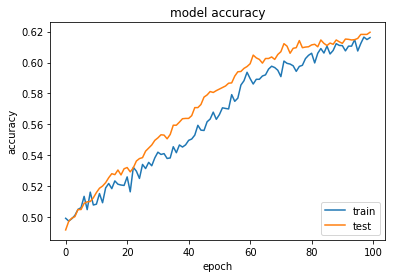

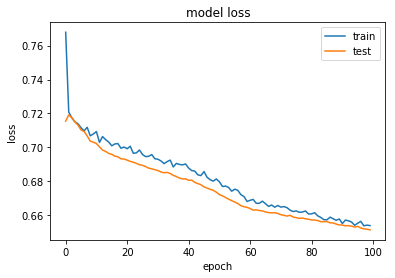

In [16]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 2 - lr = 0.001

['acc', 'loss', 'val_acc', 'val_loss']


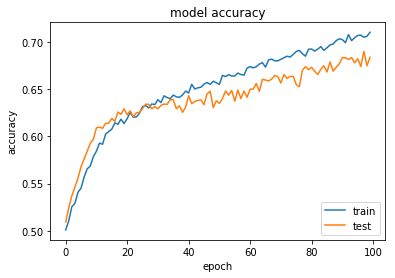

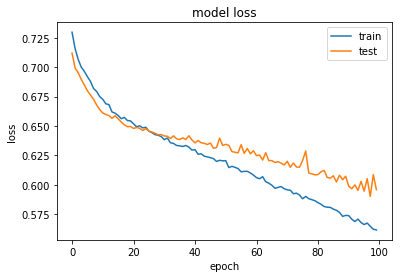

In [16]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 3 - lr = 0.00001 - kernel initialization using he_uniform - using 64, 32, 16, 32, 64 (3x3) filters for convolution layers and 32 neurons in the first dense layer

['acc', 'loss', 'val_acc', 'val_loss']


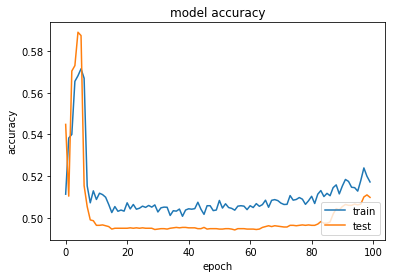

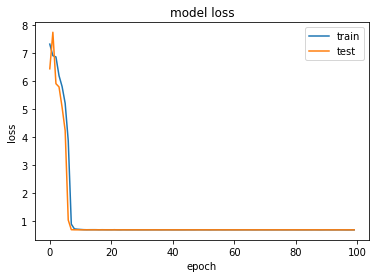

In [38]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 4 - lr = 0.001 without he_uniform as weight initialization

['loss', 'val_binary_accuracy', 'val_loss', 'binary_accuracy']


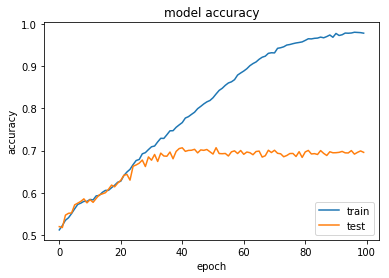

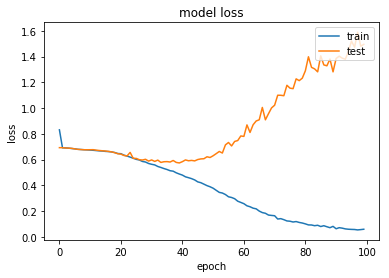

In [22]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 5 - lr = 0.0001

['loss', 'val_binary_accuracy', 'val_loss', 'binary_accuracy']


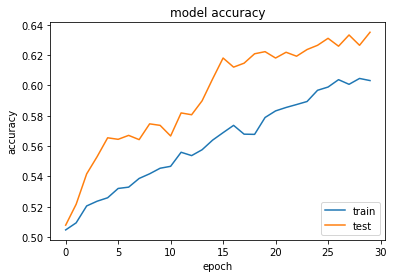

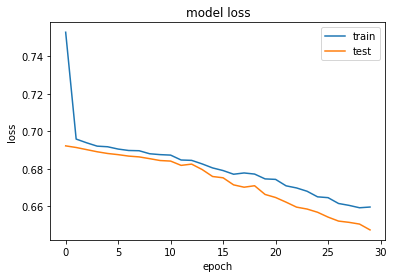

In [47]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 6 - batch size of 512

['loss', 'val_binary_accuracy', 'val_loss', 'binary_accuracy']


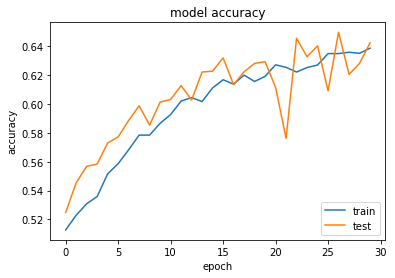

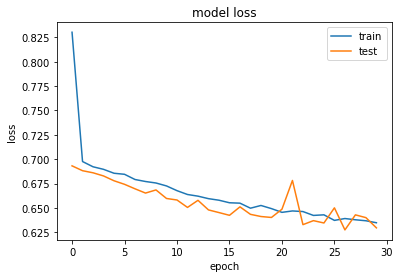

In [61]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 7 - rmsprop as optimizer - 32, 32, 64 filters for convolution layers 64 neurons in the first dense layer - dropout = 0.5

['acc', 'loss', 'val_acc', 'val_loss']


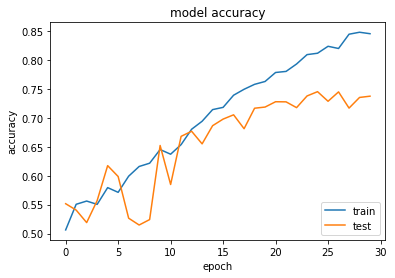

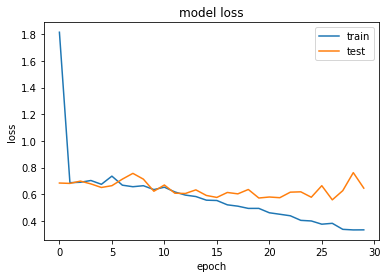

In [67]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 8 - 32, 32, 64, 64 filters for convolution layers

['acc', 'loss', 'val_acc', 'val_loss']


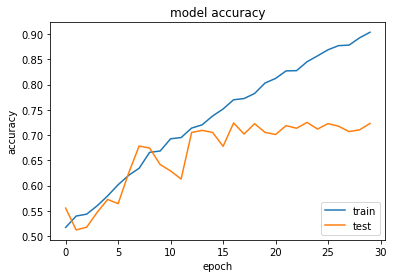

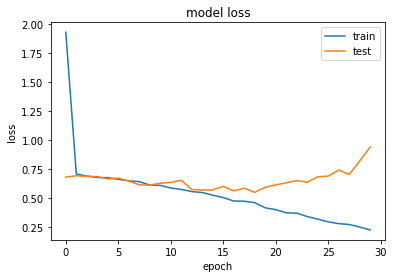

In [74]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 9 - 64, 128, 64, 32 filters for convolution layers

['acc', 'loss', 'val_acc', 'val_loss']


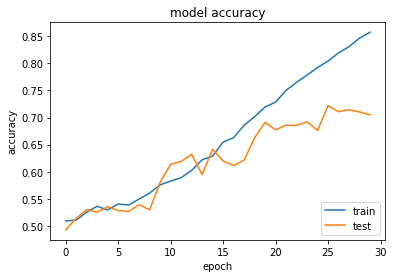

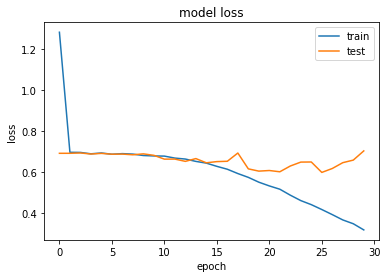

In [86]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 10 - 32, 32, 64 filters for convolution layers with centered data

['acc', 'loss', 'val_acc', 'val_loss']


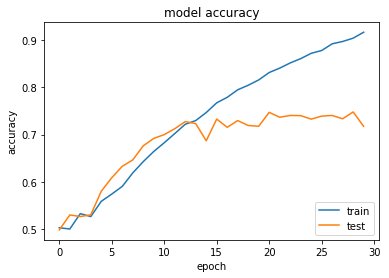

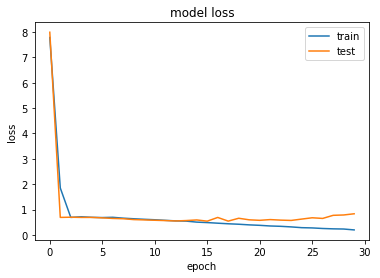

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 11 - using first technique for data generation

['acc', 'loss', 'val_acc', 'val_loss']


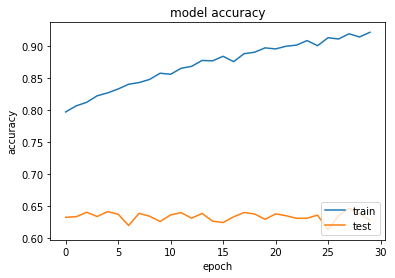

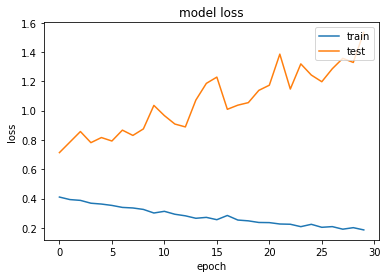

In [103]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 12 - using second technique for data generation

['acc', 'loss', 'val_acc', 'val_loss']


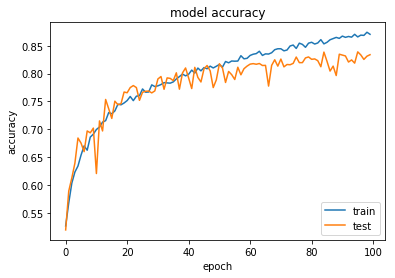

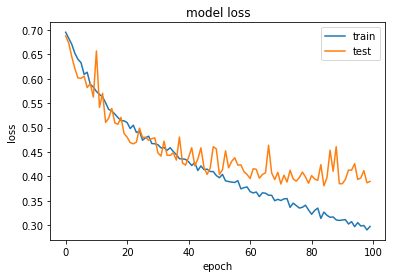

In [4]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 13 - 64, 64, 128, 128, 256 conv filters, 0.5 dropout, 256 dense neurons

['acc', 'loss', 'val_acc', 'val_loss']


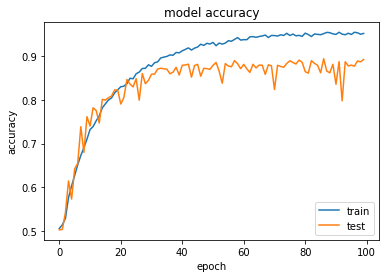

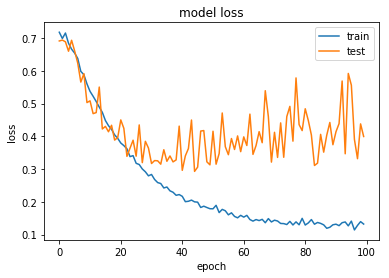

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 14 - 128, 128, 256, 256, 512 conv filters

['acc', 'loss', 'val_acc', 'val_loss']


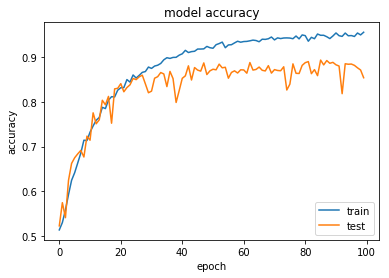

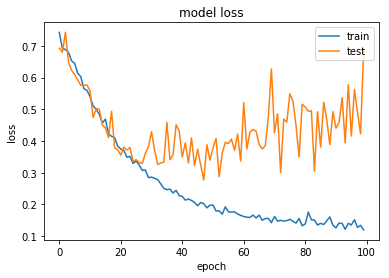

In [7]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 15 - adding more dropout layers

['acc', 'loss', 'val_acc', 'val_loss']


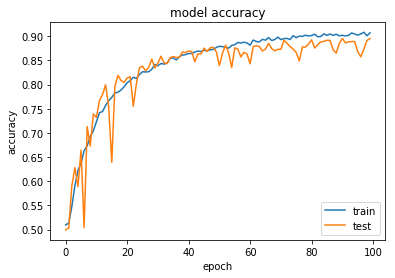

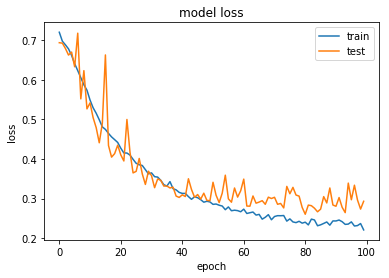

In [4]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 16 - no dropout between convolutions , 64, 64, 64, 128, 128 conv filters

['acc', 'loss', 'val_acc', 'val_loss']


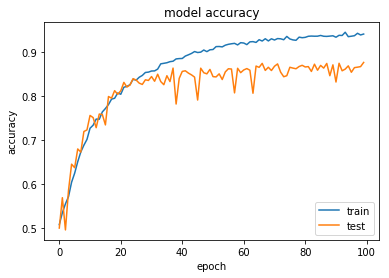

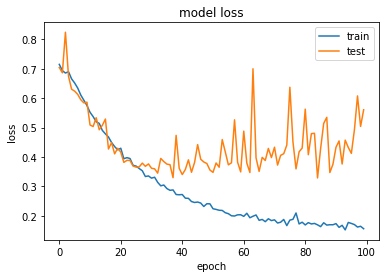

In [8]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Model 17 - 128, 128, 256, 256, 512 conv filters with dropout between convolutions

['acc', 'loss', 'val_acc', 'val_loss']


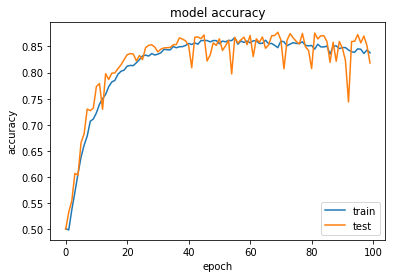

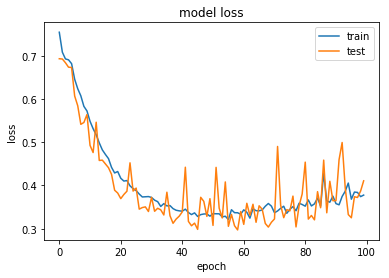

In [5]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Explanation about different changes in models employed

## Model 1 is the default model provided with lr = 0.0001 using binary crossentropy as loss and accuracy as metric with test accuracy of 0.62.
## Model 2 uses a lr of 0.001 as an effort to increase the convergence spped as the epochs cannot be greater than 100 and the performance on test set improved from 0.62 to 0.68.
## Model 3 - lr = 0.00001 - kernel initialization using he_uniform - using 64, 32, 16, 32, 64 (3x3) filters for convolution layers and 32 neurons in the first dense layer, the reason behind this was to make a valley to be optimized in the form of first decreasing and then increasing number of filters and kernel initialization for better weight initialization but the performance got worse from 0.68 to 0.51.
## Model 4 with lr of 0.001 without using he_uniform as weight initialization using a hypothesis that the performace degraded because of poor initialization and it proved correct as the performance improved from 0.68 to 0.69.
## Model 5 with lr of 0.0001 degraded performance from 0.69 to 0.62 as the learning rate decreased and the epochs reached the limit of 100 before even achieving the previous best.
## Model 6 with a batch size of 512 was used on the hypothesis thst with increase in batch size, the accuracy should increase and it proved so as the performance improved from 0.62 to 0.64.
## Model 7 - rmsprop as optimizer - 32, 32, 64 filters for convolution layers 64 neurons in the first dense layer - dropout = 0.5, this was used on the hypothesis that dropout should be increased to stop the model from overfitting and keeping the filters similar without much change and decrease in layers to make the model simpler and it proved fruitful as the performance increased from 0.69, the previous best to 0.75. 
## Model 8 - 32, 32, 64, 64 filters for convolution layers was employed to see if filters are not changed to a great extent, will the performance improve or not and the result was that the performance degraded from 0.75 to 0.71.
## Model 9 - 64, 128, 64, 32 filters for convolution layers was employed to see if the number of filters are drastically increased, will it make a difference or not but the results degraded a bit from 0.7134 to 0.7112.
## Model 10 - 32, 32, 64 filters for convolution layers with centered data, coming back to the best model so far and centering the data on the hypothesis that the performance will increase and it increased a bit to 0.7176. This should be noted that 30 epochs were used for training in both Models 7 and 10 and this proves that centering data didn't improved the performance.
## Model 11 uses data generation using   rotation, width shift, height shift, shear, zoom, horizontal flip but the performance degraded to 0.62.
## Model 12 with rescaling, shear, zoom and horizontal flip was used on the hypothesis that width shift, height shift and rotation should be removed and rescaling should be added in order to increase performance and it increased performance from previous best of 0.75 to 0.82. 
## Model 13 with 64, 64, 128, 128, 256 conv filters, 0.5 dropout, 256 dense neurons increases performance to 0.891 and surpassing all previous models.
## Model 14 - 128, 128, 256, 256, 512 conv filters doesn't helps and degrades the performance to 0.862.
# Model 15 - adding more dropout layers between convolution layers improves performance to 0.897.
# Model 16 - no dropout between convolutions , 64, 64, 64, 128, 128 conv filters downgrades performance to 0.879.
# Model 17 - 128, 128, 256, 256, 512 conv filters with dropout between convolutions downgrades performance to 0.82.
## All the performance measures provided in the above explanation are corresponding to the test set.

# Conclusion

## Model 15 with test accuracy of 0.897 is the best among the models employed using rescaling, shear, zoom and horizontal flip for data generation with a batch size of 256 using 15000 training examples while 5000 each for validation and test purposes and the results are achieved after training for 100 epochs using binary crossentropy as loss and accuracy as the metric with 5 convolution layers with 64, 64, 128, 128, 256 filters of 3x3 each, three dense layers with 256, 256 and 1 neuron respectively, dropout of 0.5 and rmsprop as the optimizer